In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

### Compute some statistics about species data

In [2]:
## get species text length
speciesFiles = os.listdir("/data/nicola/WSH/final_data/species/")
binomialName = []
speciesKey = []
textLenght = []
for file in speciesFiles:
    with open("/data/nicola/WSH/final_data/species/" + file, "r") as fp:
        fileContent = json.load(fp)
        binomialName.append(fileContent["binomial_name"])
        speciesKey.append(fileContent["species_key"])
        textLenght.append(fileContent["text_length"])
species_data = pd.DataFrame(list(zip(speciesKey, binomialName, textLenght)),columns =["species_key", "binomial_name", "text_lenght"])

In [3]:
## get species taxonomy
df = pd.read_json("/data/nicola/WSH/processed_data/species_data.json", orient="records")
df = df.drop("scientific_name", axis=1).drop_duplicates()
species_data = df.join(species_data.set_index("species_key"), on="species_key", how="inner")
df = None

In [5]:
species_data

,kingdom,phylum,class,order,family,genus,species,species_key,binomial_name,text_lenght
8,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Solidago,Solidago canadensis,5389029,Solidago canadensis,4796
100522,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,5352251,Robinia pseudoacacia,23580
133592,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Erigeron,Erigeron annuus,3117449,Erigeron annuus,3823
320430,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Trifolium,Trifolium repens,5358748,Trifolium repens,14238
323989,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus europaeus,3169131,Euonymus europaeus,5787
...,...,...,...,...,...,...,...,...,...,...
4472309,Animalia,Arthropoda,Arachnida,Trombidiformes,Trombidiidae,Trombidium,Trombidium holosericeum,4540860,Trombidium holosericeum,1630
4666322,Plantae,Bryophyta,Bryopsida,Hypnales,Brachytheciaceae,Brachythecium,Brachythecium mildeanum,2679962,Brachythecium mildeanum,255
4667961,Plantae,Bryophyta,Bryopsida,Dicranales,Dicranaceae,Kiaeria,Kiaeria blyttii,5282185,Kiaeria blyttii,244
4665791,Plantae,Bryophyta,Bryopsida,Hypnales,Brachytheciaceae,Kindbergia,Kindbergia praelonga,4279479,Kindbergia praelonga,659


In [ ]:
## get species number of occurences
df = pd.read_json("/data/nicola/WSH/processed_data/species_habitats_records.json", orient="records").drop_duplicates()
df = pd.DataFrame(df["species_key"].value_counts())
df.columns=["observations_count"]
species_data = species_data.join(df, on="species_key", how="inner")
df = None

In [ ]:
len(pd.read_json("/data/nicola/WSH/processed_data/species_habitats_records.json", orient="records"))

1098584

In [ ]:
len(species_data)

5198

In [ ]:
species_data.head()

,kingdom,phylum,class,order,family,genus,species,species_key,binomial_name,text_lenght,observations_count
8,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Solidago,Solidago canadensis,5389029,Solidago canadensis,4796,1461
100522,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,5352251,Robinia pseudoacacia,23580,1294
133592,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Erigeron,Erigeron annuus,3117449,Erigeron annuus,3823,1182
320430,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Trifolium,Trifolium repens,5358748,Trifolium repens,14238,143
323989,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus europaeus,3169131,Euonymus europaeus,5787,118


In [ ]:
## Overall text length and obsercations count distributions
species_data.describe()

,species_key,text_lenght,observations_count
count,5.198000e+03,5198.000000,5198.000000
mean,4.049562e+06,4366.070027,38.058484
std,2.255535e+06,7832.387447,82.797309
min,1.013335e+06,79.000000,1.000000
25%,2.494764e+06,780.000000,3.000000
50%,3.049742e+06,2217.000000,12.000000
75%,5.342410e+06,4540.750000,40.000000
max,1.215520e+07,184067.000000,2146.000000


In [ ]:
## Number of documented species per kingdom
pd.DataFrame(species_data["kingdom"].value_counts())

,kingdom
Animalia,2300
Plantae,2140
Fungi,743
Chromista,7
Protozoa,5
Bacteria,3


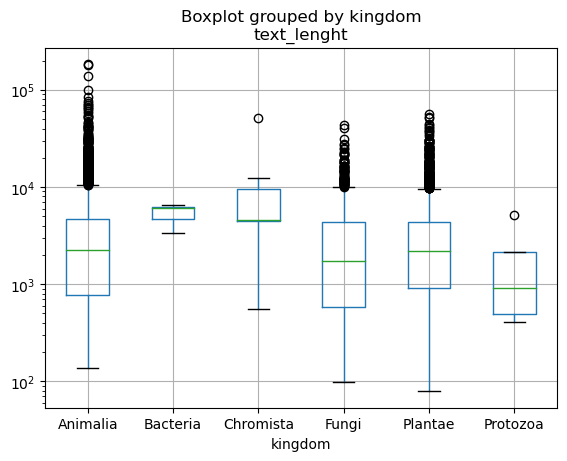

In [ ]:
## Textlenght by kingom
ax = species_data.boxplot(column="text_lenght", by="kingdom")
ax.set_yscale("log")

In [ ]:
## Total number of observations by kingdom
pd.DataFrame(species_data.groupby("kingdom")["observations_count"].sum())

,observations_count
kingdom,
Animalia,70459
Bacteria,3
Chromista,9
Fungi,5359
Plantae,121983
Protozoa,15


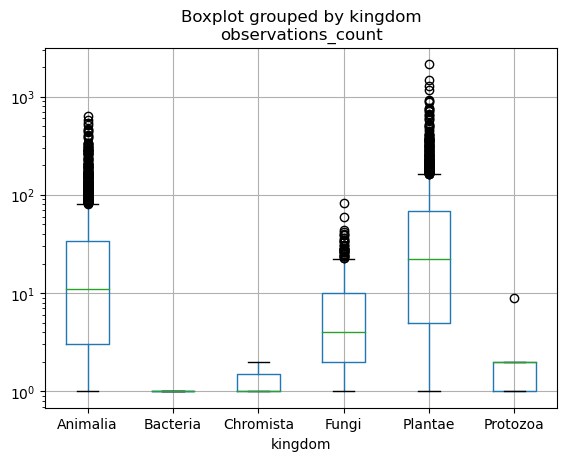

In [ ]:
## Species number of observations distribution by kingdom
ax = species_data.boxplot(column="observations_count", by="kingdom")
ax.set_yscale("log")

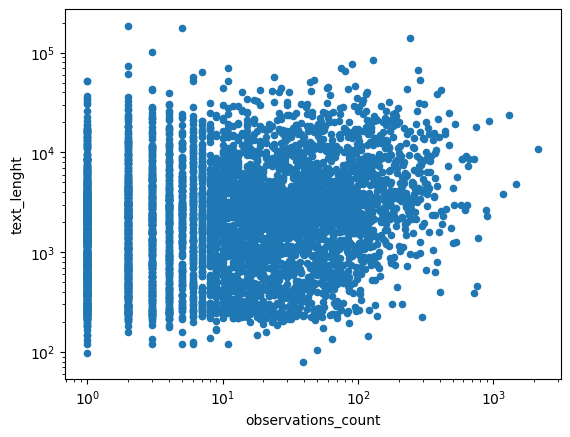

In [ ]:
## Text length to observation count relation
ax = species_data.plot.scatter(x="observations_count", y="text_lenght")
ax.set_yscale("log")
ax.set_xscale("log")